In [18]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Extract features (mfcc, chroma, mel) from a sound file

In [19]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [20]:
#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [21]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob(r"C:\Users\Ram\Desktop\SER\speech-emotion-recognition-ravdess-data\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [11]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppD

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-9.1552734e-05 -6.4086914e-04 -5.1879883e-04 ... -6.1035156e-05
  2.4414062e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0007019   0.0012207   0.00125122 ...  0.          0.00039673
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspe

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 7.6293945e-04 -3.0517578e-05  0.0000000e+00 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 2.1362305e-04  7.9345703e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -3.3569336e-04
 -3.9672852e-04 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-3.0517578e-05  4.2724609e-04  6.4086914e-04 ...  1.2207031e-04
  9.1552734e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -1.8310547e-04
 -1.8310547e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 1.5258789e-04  1.5258789e-04  1.2207031e-04 ... -9.1552734e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 9.4604492e-04 8.5449219e-04
 8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.fe

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ... -1.2207031e-04
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1362305e-04
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-1.5258789e-04 -9.1552734e-05  6.1035156e-05 ...  9.1552734e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 1.2207031e-04 ... 3.3569336e-04 2.4414062e-04
 2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  6.1035156e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.9672852e-04
  3.6621094e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mea

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[0.00082397 0.00082397 0.00073242 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[2.1362305e-04 2.1362305e-04 2.1362305e-04 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[0.00039673 0.00042725 0.00039673 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,ax

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-2.1362305e-04 -9.1552734e-05  0.0000000e+00 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[1.8310547e-04 1.5258789e-04 3.0517578e-05 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.5258789e-04 ... -2.4414062e-04
 -9.1552734e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -2.4414062e-04
 -2.4414062e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[0.         0.         0.         ... 0.00308228 0.00311279 0.00308228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogra

C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 5.4931641e-04  1.1901855e-03  5.4931641e-04 ...  3.0517578e-05
 -1.4343262e-03 -8.5449219e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4414062e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Ram\AppData\Local\Temp\ipykernel_8176\881083529.py:15: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(libr

In [28]:
x_train

array([[-5.22061890e+02,  3.50668907e+01,  3.75342917e+00, ...,
         1.65243138e-04,  1.04321596e-04,  6.55571566e-05],
       [-6.41227722e+02,  4.49487762e+01, -1.85174119e+00, ...,
         3.89261913e-05,  3.05255344e-05,  2.94166657e-05],
       [-6.50705750e+02,  5.30211639e+01, -4.92040443e+00, ...,
         4.75216839e-05,  3.46632551e-05,  1.62844426e-05],
       ...,
       [-5.50096191e+02,  1.70297680e+01, -1.14575634e+01, ...,
         1.51764631e-04,  1.16828531e-04,  8.47479314e-05],
       [-5.55357605e+02,  4.71569710e+01,  1.10750742e+01, ...,
         1.61086471e-04,  1.04962470e-04,  6.52811723e-05],
       [-5.04816345e+02,  3.53618660e+01, -1.43495789e+01, ...,
         6.08151546e-04,  5.55269769e-04,  4.47782193e-04]])

In [22]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [23]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [24]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [25]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [29]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)
y_pred

array(['happy', 'calm', 'happy', 'happy', 'fearful', 'calm', 'calm',
       'fearful', 'calm', 'happy', 'happy', 'calm', 'fearful', 'happy',
       'disgust', 'happy', 'calm', 'calm', 'happy', 'calm', 'calm',
       'disgust', 'happy', 'calm', 'happy', 'happy', 'calm', 'happy',
       'fearful', 'fearful', 'happy', 'fearful', 'happy', 'fearful',
       'happy', 'calm', 'calm', 'fearful', 'calm', 'calm', 'happy',
       'calm', 'calm', 'calm', 'fearful', 'calm', 'calm', 'happy', 'calm',
       'happy', 'fearful', 'fearful', 'fearful', 'fearful', 'happy',
       'fearful', 'calm', 'happy', 'calm', 'calm', 'disgust', 'calm',
       'happy', 'calm', 'happy', 'calm', 'calm', 'calm', 'fearful',
       'happy', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful',
       'disgust', 'fearful', 'happy', 'calm', 'fearful', 'calm', 'calm',
       'fearful', 'calm', 'disgust', 'calm', 'calm', 'fearful', 'happy',
       'fearful', 'happy', 'fearful', 'calm', 'happy', 'disgust',
       'fearful', '

In [27]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 64.58%


In [ ]:
# creating the dataset
courses = list(final.keys())
values = list(final.values())
  
fig = plt.figure(figsize = (10,5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',width = 0.4)
for rect1 in courses:
    height = rect1.get_height()
    nari='%.2f'%height
    plt.annotate( "{}%".format(nari),(rect1.get_x() + rect1.get_width()/2, height-0.5),ha="center",va="bottom",fontsize=15)
plt.xlabel("Classifiers",color ='blue')
plt.ylabel("Accuracy in %",color ='blue')
plt.title("Final Report",color ='blue')
plt.show()

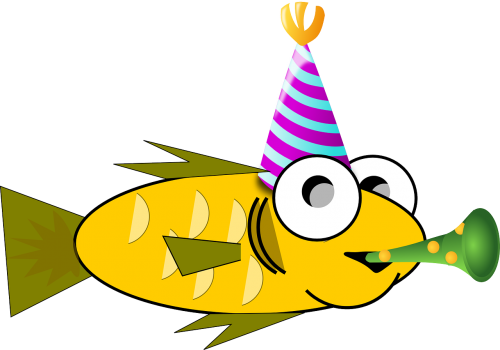

In [25]:
from IPython.display import Image
d={5:"fun.png",6:"SER.png",7:"fun.png"}
Image(d[5])